## Travel Review Ratings 

Attribute 1 : Unique user id 
Attribute 2 : Average ratings on churches 
Attribute 3 : Average ratings on resorts 
Attribute 4 : Average ratings on beaches 
Attribute 5 : Average ratings on parks 
Attribute 6 : Average ratings on theatres 
Attribute 7 : Average ratings on museums 
Attribute 8 : Average ratings on malls 
Attribute 9 : Average ratings on zoo 
Attribute 10 : Average ratings on restaurants 
Attribute 11 : Average ratings on pubs/bars 
Attribute 12 : Average ratings on local services 
Attribute 13 : Average ratings on burger/pizza shops 
Attribute 14 : Average ratings on hotels/other lodgings 
Attribute 15 : Average ratings on juice bars 
Attribute 16 : Average ratings on art galleries 
Attribute 17 : Average ratings on dance clubs 
Attribute 18 : Average ratings on swimming pools 
Attribute 19 : Average ratings on gyms 
Attribute 20 : Average ratings on bakeries 
Attribute 21 : Average ratings on beauty & spas 
Attribute 22 : Average ratings on cafes 
Attribute 23 : Average ratings on view points 
Attribute 24 : Average ratings on monuments 
Attribute 25 : Average ratings on gardens

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster, metrics
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv('google_review_ratings.csv')
data=data.drop(['Unnamed: 25'], axis=1)
data=data.drop([1347, 2712]) #此2筆資料有誤
data.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


### 以silhouette方法決定最佳的分群群數

由得到的結果可發現不同的群數雖然各有差異，但是差異並不大，故判斷K值影響並不大

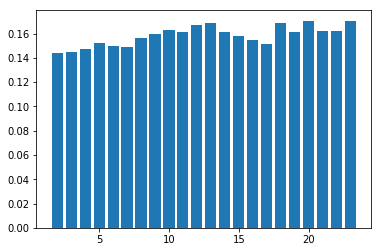

[0.14431444662212622, 0.14436909613604768, 0.14706161545540875, 0.15226013872188568, 0.15012355298074612, 0.14876476694835417, 0.1559784654477748, 0.16001183708340805, 0.16272403448843512, 0.16095914839678332, 0.16727414982125574, 0.1683664818752633, 0.16136074756385638, 0.15759265817121715, 0.15505921791693553, 0.15106961317022694, 0.1690444404704303, 0.1612598130864021, 0.1705457711067143, 0.16247677644992273, 0.16234737092560317, 0.17021514132347396]


In [3]:
silhouette_avgs=[]
ks=range(2, 24)
for k in ks:
    kmeans_fit=cluster.KMeans(n_clusters=k).fit(data.loc[:, data.columns!="User"])
    cluster_labels=kmeans_fit.labels_
    silhouette_avg=metrics.silhouette_score(data.loc[:, data.columns!="User"], cluster_labels)
    silhouette_avgs.append(silhouette_avg)

plt.bar(ks, silhouette_avgs)
plt.show()
print(silhouette_avgs)

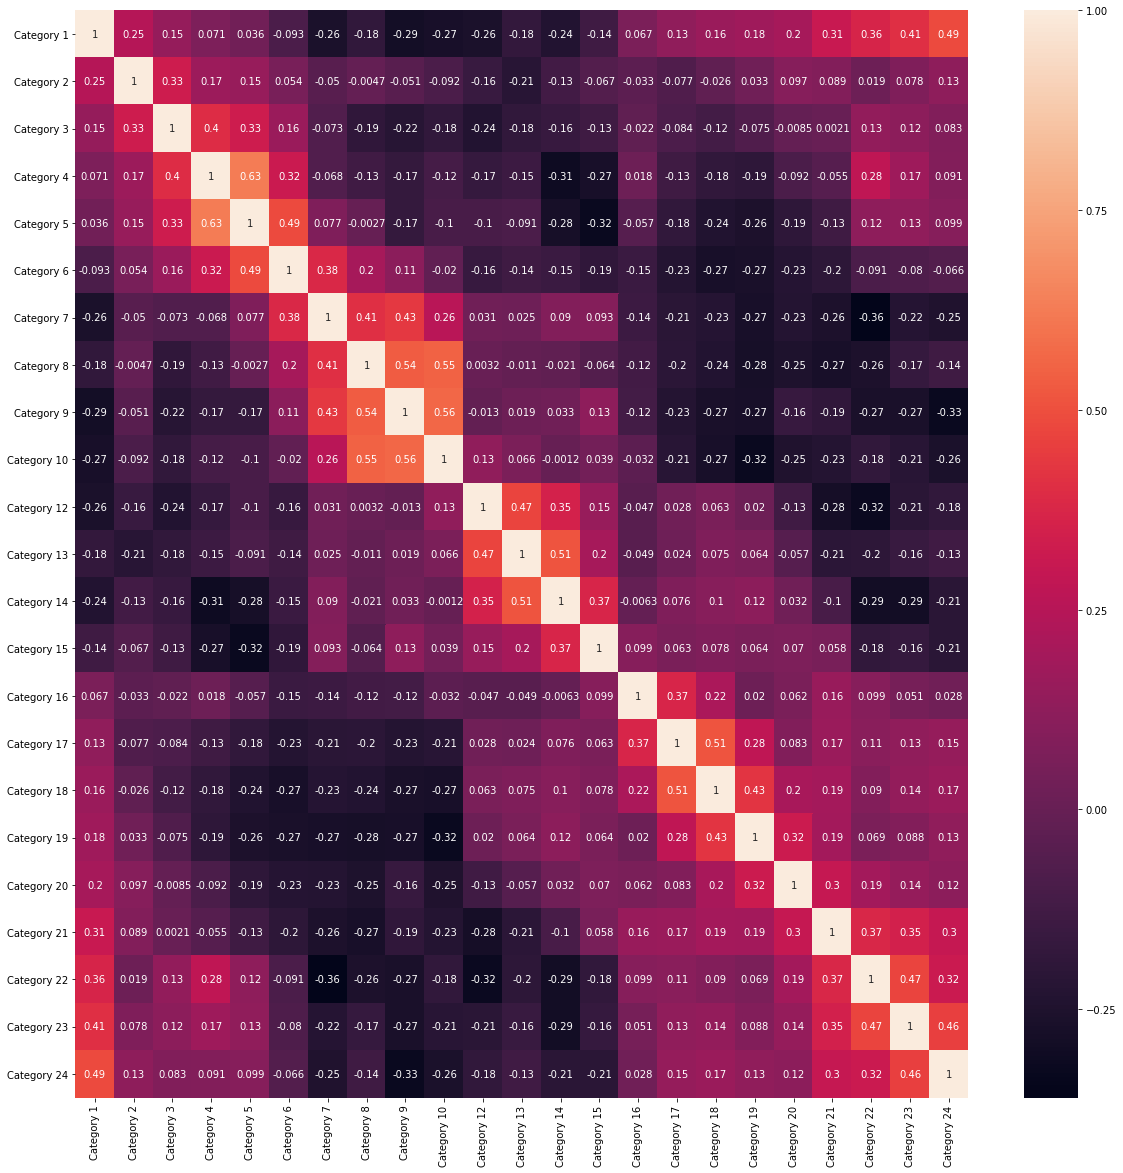

In [4]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), annot=True)

### 問題設計：以分群演算法分析使用者所偏好的景點

給定的資料中只有使用者對於各個景點的評價，又根據上面的heatmap可以發現各個特徵彼此的相關性，所以這邊進一步將各景點歸類並算出平均分數，並以此為依據，對使用者的喜好加入標籤。
#### (4)餐飲類: 10, 11, 13, 15, 19, 20, 22
#### (3)運動類: 17, 18, 19
#### (2)歷史文藝類: 2, 7, 16, 24, 
#### (1)休閒類: 3, 4, 5, 6, 8, 9, 11, 14, 21
#### (0)景觀類: 2, 4, 23, 25

In [5]:
for i in data.index[:]:
    a=(data["Category 1"][i]+data["Category 3"][i]+data["Category 22"][i]+data["Category 24"][i])/4
    b=(data["Category 2"][i]+data["Category 3"][i]+data["Category 4"][i]+data["Category 5"][i]+data["Category 7"][i]+data["Category 8"][i]+data["Category 10"][i]+data["Category 13"][i]+data["Category 20"][i])/9
    c=(data["Category 1"][i]+data["Category 6"][i]+data["Category 15"][i]+data["Category 23"][i])/4
    d=(data["Category 16"][i]+data["Category 17"][i]+data["Category 18"][i])/3
    e=(data["Category 9"][i]+data["Category 10"][i]+data["Category 12"][i]+data["Category 14"][i]+data["Category 18"][i]+data["Category 19"][i]+data["Category 21"][i])/7
    if max(a, b, c, d, e)==a:
        data.loc[i, "label"]=0
    elif max(a, b, c, d, e)==b:
        data.loc[i, "label"]=1
    elif max(a, b, c, d, e)==c:
        data.loc[i, "label"]=2
    elif max(a, b, c, d, e)==d:
        data.loc[i, "label"]=3
    elif max(a, b, c, d, e)==e:
        data.loc[i, "label"]=4
data=data.drop(['User'], axis=1)
data.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,label
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,1.0


### 比較以標籤所得到的分群，和以Kmeans演算法得到的分群之間的差異

加入標籤後使用者被分為5群，而Kmeans演算法的k值也同樣設為5。首先是訓練及測試數據中得到的各群的資料筆數，接著是詳細的對照；從各群的資料筆數就可以發現兩者的差異其實頗大。

In [6]:
x_train, x_test, y_train, y_test=train_test_split(data.loc[:, data.columns!="label"], data["label"], test_size=0.25, random_state=0)

kmeans_fit=cluster.KMeans(n_clusters=5).fit(x_train)
cluster_labels=kmeans_fit.labels_
test=kmeans_fit.predict(x_test)
        
for i in range(0, 5):
    print(list(cluster_labels).count(i), list(y_train).count(i))
print("==================")
for i in range(0, 5):
    print(list(test).count(i), list(y_test).count(i))

for i in range(len(cluster_labels)):
    if i!=1347 and i!=2712:
        print(cluster_labels[i], int(y_train[y_train.index[i]]))
print("==================")
for i in range(len(test)):
    if i!=1347 and i!=2712:
        print(test[i], int(y_test[y_test.index[i]]))

560 622
874 2230
712 597
687 195
1257 446
182 206
298 755
237 199
221 58
426 146
3 2
1 1
3 1
3 2
1 1
0 1
3 1
2 2
3 4
0 1
4 1
0 0
3 4
2 3
2 2
2 2
2 1
4 2
4 1
1 1
4 1
2 0
2 0
4 1
3 4
2 3
1 1
3 2
0 1
3 1
4 2
1 1
4 1
1 1
1 1
1 2
1 1
4 1
2 2
4 1
1 1
4 1
0 0
1 1
2 4
2 0
1 1
4 1
2 1
2 3
1 1
4 0
1 1
2 0
4 1
4 1
1 2
4 1
1 1
1 1
4 2
4 1
3 4
4 2
0 0
3 1
4 2
3 1
1 1
3 4
4 2
4 1
2 1
2 0
4 1
3 4
1 1
2 3
3 4
0 0
3 1
1 1
1 1
1 1
2 2
3 4
0 0
3 1
0 2
4 1
4 1
4 0
3 4
2 1
4 1
2 0
4 1
4 1
3 4
0 0
2 2
4 1
4 1
4 2
3 3
3 4
2 3
0 1
2 2
3 4
2 3
1 1
3 2
1 1
0 0
1 1
0 4
1 1
3 2
3 4
1 1
4 1
4 1
3 4
4 1
2 0
1 2
0 0
2 0
4 1
2 0
4 1
2 3
2 0
4 2
4 1
1 1
2 1
2 3
2 3
4 1
0 1
1 1
3 4
4 1
2 3
3 1
2 2
3 2
3 4
4 0
3 4
0 1
1 2
1 4
4 1
4 1
0 1
3 4
1 1
1 1
2 3
4 1
1 1
4 1
2 0
4 1
3 4
4 1
3 2
4 1
0 1
3 4
1 1
1 1
4 1
4 1
4 1
3 2
4 1
4 2
3 4
2 3
4 2
4 1
0 2
4 2
4 1
1 1
0 0
3 1
1 1
3 4
2 3
2 0
2 1
3 2
4 0
4 1
4 1
1 4
0 0
0 0
0 0
3 1
2 1
3 2
1 1
3 4
3 4
4 1
2 0
4 1
3 1
2 4
3 4
1 4
1 1
2 1
2 2
0 1
4 1
2 2
2 0
3 2
2 3
1 1
3 3
1 1
1 1

1 4
4 1
3 4
4 2
3 2
1 2
1 1
3 3
1 1
1 1
0 1
4 1
3 4
2 2
3 3
1 1
4 1
4 1
1 2
4 2
4 1
2 0
1 1
1 1
3 2
3 2
4 1
0 1
2 3
4 1
3 4
4 1
1 4
4 1
3 4
4 1
3 4
1 4
3 4
2 1
2 0
1 1
2 1
4 1
4 2
4 1
4 1
1 1
4 1
3 3
4 1
2 0
3 1
4 1
3 1
4 1
2 0
2 0
4 2
1 1
2 3
1 1
2 2
4 2
2 0
3 2
2 4
0 1
4 1
1 2
0 0
3 2
3 1
3 4
0 1
3 4
1 4
0 1
4 1
1 1
2 1
3 2
0 0
0 1
4 1
1 1
2 0
1 2
1 4
4 1
3 1
1 1
1 1
1 1
2 1
0 0
1 3
4 1
1 1
3 4
2 2
2 0
1 1
4 1
0 1
4 2
0 0
2 3
1 1
4 1
1 1
4 1
4 1
4 1
0 1
2 1
4 1
3 4
2 0
1 1
1 1
3 2
0 0
3 4
2 4
4 1
3 1
4 1
0 0
1 1
2 3
0 1
1 4
0 0
4 1
2 2
4 1
0 1
2 0
4 1
1 1
2 4
2 2
3 1
0 1
4 1
4 1
2 3
3 4
4 1
2 0
4 1
2 1
4 1
4 1
1 1
2 1
4 1
0 1
3 1
4 1
1 1
4 0
1 1
2 3
0 0
3 4
0 0
0 1
1 1
4 2
0 1
1 1
1 4
4 1
2 0
1 1
4 1
1 1
4 1
3 4
4 1
4 1
2 4
3 1
4 2
2 0
1 1
2 4
4 1
0 0
4 1
2 0
4 1
4 1
2 4
3 2
0 1
4 2
4 1
4 1
3 1
3 1
2 2
4 1
4 2
0 0
3 1
4 1
0 0
4 1
4 1
1 1
4 1
2 1
1 1
4 1
0 1
1 1
1 0
4 1
0 0
2 2
0 1
3 3
0 0
4 2
3 2
1 1
0 0
2 0
0 0
3 4
1 1
1 1
2 3
2 0
2 2
0 0
2 0
0 0
0 0
0 0
0 0
0 0
1 1
4 1
4 1
4 1
4 1


3 2
1 1
4 1
0 1
0 0
2 0
0 0
2 0
2 0
2 0
2 2
4 1
0 2
0 0
2 0
2 0
4 1
2 0
3 1
3 2
1 0
1 1
3 4
2 2
4 1
4 1
3 2
1 1
4 1
4 1
4 1
0 0
4 1
1 1
3 1
0 4
4 1
2 0
4 1
3 4
4 1
4 1
4 2
0 1
4 1
4 1
3 4
2 1
1 1
4 1
3 4
4 1
4 1
0 1
4 1
3 2
2 4
2 0
4 1
4 1
0 0
1 1
1 4
4 2
3 4
1 2
1 1
2 1
4 1
1 1
4 1
4 1
0 0
1 2
4 1
4 1
0 2
3 2
0 1
2 2
4 1
1 1
3 1
4 1
4 1
3 1
1 1
0 1
3 2
3 2
0 0
0 0
0 1
1 1
1 4
2 0
4 2
4 1
3 4
4 1
0 1
4 1
4 2
0 2
4 1
3 4
3 4
0 0
1 1
0 1
3 4
4 1
3 4
1 1
3 1
3 1
4 2
4 2
4 1
1 1
4 2
4 1
4 1
3 1
4 1
4 1
4 1
2 3
2 0
1 1
4 1
2 3
4 2
2 4
1 1
0 0
4 1
1 1
1 1
1 2
2 1
2 0
3 4
1 1
3 4
2 4
4 1
4 1
1 1
1 4
4 1
4 1
3 1
3 2
0 0
4 1
4 1
2 4
2 0
4 1
1 1
4 1
3 1
0 1
1 1
0 1
3 2
1 1
2 0
2 3
1 1
3 1
3 3
2 2
4 1
4 2
4 1
1 1
4 2
4 1
1 1
3 2
2 2
4 2
0 1
1 1
3 4
2 1
4 1
1 1
1 1
2 0
1 1
3 1
0 1
2 2
1 1
1 1
0 1
4 1
4 1
2 0
4 1
1 1
4 2
0 0
1 1
2 0
2 1
4 1
2 0
1 1
1 1
3 3
4 1
3 3
2 0
3 3
1 1
1 1
4 1
4 1
2 3
2 0
4 1
0 0
3 4
3 3
0 1
4 1
1 1
1 1
2 1
4 1
0 0
4 1
3 4
2 2
0 1
0 0
3 4
1 1
1 1
0 0
3 4
3 4
1 1
0 1
4 0
2 0


### 改善

嚴格來說，上面的方法應該無法稱為分群，因為所謂的分群應該是無監督式學習；且由於加上標籤的方式並不夠全面，無法真實代表整份資料的分布，所以和Kmeans的結果理所當然會有相當的差異。以下改以SVM的分類方式去分析並得到模型，而模型預測出的結果也相當不錯。

In [7]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

penalty=0.001
model_svm=SVC(C=penalty, kernel="linear", probability=True)
model_svm.fit(x_train, y_train)

train_preds=model_svm.predict(x_train)
train_acc=accuracy_score(y_train, train_preds)
test_preds=model_svm.predict(x_test)
test_acc=accuracy_score(y_test, test_preds)

print("Train accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

Train accuracy:  0.863080684596577
Test accuracy:  0.8599706744868035
